In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pickle
from IPython.display import YouTubeVideo
import warnings
warnings.simplefilter('ignore', UserWarning)
import time
import os
if not os.path.exists('../data/acgan'):
    os.mkdir('../data/acgan')

import tensorflow as tf
try:
    import keras
except ModuleNotFoundError:
    from tensorflow import keras
print('GPU:', tf.test.is_gpu_available())
import seaborn as sns
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

GPU: True


# Generative Adversarial Networks
In this exercise you will extend the generative adversarial model we did in the [GAN session](../sessions/GAN.ipynb) so that the generator recieves the **specific digit to be generated**, and the discriminator not only decides if an image is "fake" or "real", but also classifies the digit in the image. 
The framework I suggest you use is the [Auxiliary Classifier Generative Adversarial Network](https://arxiv.org/abs/1610.09585) where the "auxiliary classifier" is the additional classifier employed by the discriminator. This is instead of using two separate discriminators.

This can be considered a "hard" exercise. You'll probably want to read a bit and search the web a bit as there is a conceptual "jump" between GAN and ACGAN in terms of the implementation.
Still, much of the code from the [GAN session](../sessions/GAN.ipynb) can be reused here.

You can find a code example on the [Keras repo](https://github.com/keras-team/keras/blob/master/examples/mnist_acgan.py) or check the [solution](../solutions/ACGAN.ipynb), but I suggest you try doing it yourself before you look at the code. 

The movie below shows the digits generated by the network in the [solution](../solutions/ACGAN.ipynb).

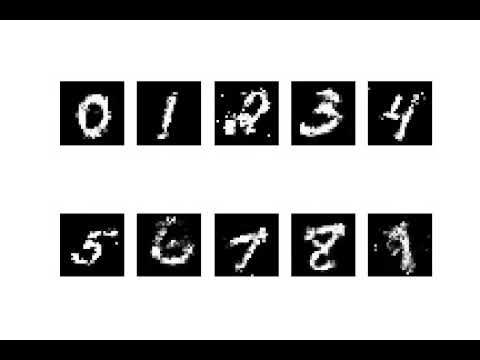

In [43]:
YouTubeVideo('-h-5YCfQUVU')

Save model:

In [88]:
generator.save('../data/acgan_generator.h5')
discriminator.save('../data/acgan_discriminator.h5')
combined.save('../data/acgan_combined.h5')

In [89]:
with open('../data/acgan_history.p', 'wb') as f:
    pickle.dump([train_history, test_history], f)

Plot history:

In [4]:
with open('../data/acgan_history.p', 'rb') as f:
    train_history, test_history = pickle.load(f)

In [33]:
__, _, _, tr_val_acc, tr_class_acc = np.array(train_history['dloss']).T
__, _, _, te_val_acc, te_class_acc = np.array(test_history['dloss']).T

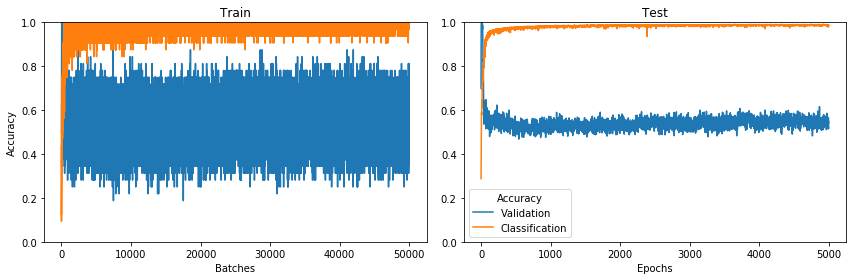

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.plot(tr_val_acc, label='Validation')
ax.plot(tr_class_acc, label='Classification')
ax.set(ylim=(0, 1), xlabel='Batches', title='Train', ylabel='Accuracy')
# ax.legend(title='Accuracy')

ax = axes[1]
ax.plot(te_val_acc, label='Validation')
ax.plot(te_class_acc, label='Classification')
ax.set(ylim=(0, 1), xlabel='Epochs', title='Test')
ax.legend(title='Accuracy')
fig.tight_layout()

Generate digits:

In [79]:
generator = keras.models.load_model('../data/acgan_generator.h5')

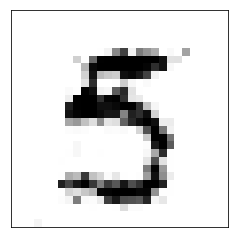

In [87]:
digit = 5

noise = np.random.normal(0, 1, 100).reshape(1, -1)
digit = np.array(digit).reshape(1, -1)
gen_img = generator.predict([noise, digit]).squeeze()
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.imshow(gen_img, cmap='gray_r')
plt.xticks([])
plt.yticks([]);

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Data Science with Python_](https://github.com/yoavram/DataSciPy) workshop.

The notebook was written using [Python](http://python.org/) 3.6.5.

This work is licensed under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)